# Public green spaces

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import requests
import warnings
from datetime import datetime
import re
warnings.filterwarnings("ignore")
import geopandas as gpd
pd.options.display.max_columns = 40
import seaborn as sns
import matplotlib.pyplot as plt

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
# Read file
public_green_spaces = gpd.read_file('Public Green Spaces.gpkg')
# Info
public_green_spaces.shape

(190, 36)

In [3]:
public_green_spaces.head (5)

,cartodb_id,objectid,nom,municipi,tipus,area_ha,districte,codi,compacitat,mida,fet,ndvi,gestio,near_fores,districte_,id,id2,near_metro,near_bus,near_fcgc,near_renfe,near_tramv,rao_no_fet,near_mar,near_colls,fets_bcn_b,muni_codi,treball_am,codi_bcn_b,codi_1,modificat_,codi_vell,shape_leng,shape_area,codi_merge,geometry
0,16,1,Jardins de Can Mantega,Barcelona,Parc,0.895251,Sants-Montjuïc,SMO001,23.304577,0.5 - 1 Ha,1,0.0,NaN,2341.049604,SMO,1.0,1,342.369555,131.392523,1306.930570,576,1061.943229,NaN,1.0,2387.972571,SI,SMO,NO,SMO001,SMO001,NaN,SMO001,384.152406,8952.509260,SMO001,"MULTIPOLYGON (((427469.578 4581120.708, 427456..."
1,18,2,Jardins de Málaga,Barcelona,Parc,0.651736,Sants-Montjuïc,SMO002,12.605915,0.5 - 1 Ha,1,0.0,NaN,2553.002867,SMO,2.0,2,12.530790,15.995031,1061.924149,331,882.135426,NaN,1.0,2663.536753,SI,SMO,NO,SMO002,SMO002,NaN,SMO002,517.007722,6517.355167,SMO002,"MULTIPOLYGON (((428135.706 4581620.165, 428126..."
2,19,3,Jardins de Celestina Vigneaux,Barcelona,Parc,0.702333,Sants-Montjuïc,SMO006,14.159021,0.5 - 1 Ha,1,0.0,NaN,1288.118873,SMO,6.0,6,383.723863,24.427341,398.307149,810,2103.839400,NaN,1.0,2395.164286,SI,SMO,NO,SMO006,SMO006,NaN,SMO006,496.032131,7023.329520,SMO006,"MULTIPOLYGON (((428243.855 4580349.333, 428238..."
3,1,4,Jardins del Valent Petit,Barcelona,Parc,0.886938,Sants-Montjuïc,SMO008,23.022381,0.5 - 1 Ha,1,0.0,NaN,1061.868912,SMO,8.0,8,279.028734,76.825440,397.878877,1536,2249.230041,NaN,1.0,1609.888884,SI,SMO,NO,SMO008,SMO008,NaN,SMO008,385.250215,8869.377381,SMO008,"MULTIPOLYGON (((427611.583 4579611.724, 427601..."
4,20,5,Parc de Can Sabaté,Barcelona,Parc,1.939619,Sants-Montjuïc,SMO009,24.561116,1 - 2 Ha,1,0.0,NaN,552.969088,SMO,9.0,9,79.520859,31.388393,347.184932,1633,2630.114963,NaN,1.0,1399.901317,SI,SMO,NO,SMO009,SMO009,NaN,SMO009,789.711341,19396.191905,SMO009,"MULTIPOLYGON (((427908.040 4579530.346, 427909..."


In [4]:
# Drop columns
public_green_spaces = public_green_spaces.drop(columns=['cartodb_id', 'objectid','nom','compacitat','fet','ndvi', 'gestio','near_fores','districte_','id','id2','near_metro','near_bus',
                                                         'near_fcgc','near_renfe', 'near_tramv', 'rao_no_fet', 'near_mar', 'near_colls', 'fets_bcn_b', 'muni_codi','treball_am', 'codi_bcn_b',
                                                         'codi_1', 'modificat_', 'codi_vell', 'shape_leng', 'shape_area', 'codi_merge', 'geometry'])
public_green_spaces.columns

Index(['municipi', 'tipus', 'area_ha', 'districte', 'codi', 'mida'], dtype='object')

In [5]:
public_green_spaces.head (5)

,municipi,tipus,area_ha,districte,codi,mida
0,Barcelona,Parc,0.895251,Sants-Montjuïc,SMO001,0.5 - 1 Ha
1,Barcelona,Parc,0.651736,Sants-Montjuïc,SMO002,0.5 - 1 Ha
2,Barcelona,Parc,0.702333,Sants-Montjuïc,SMO006,0.5 - 1 Ha
3,Barcelona,Parc,0.886938,Sants-Montjuïc,SMO008,0.5 - 1 Ha
4,Barcelona,Parc,1.939619,Sants-Montjuïc,SMO009,1 - 2 Ha


In [6]:
# Checking for null values
nulls = pd.DataFrame(public_green_spaces.isna().sum()/len(public_green_spaces))
nulls= nulls.reset_index()
nulls.columns = ['column_name', 'Percentage Null Values']
nulls.sort_values(by='Percentage Null Values', ascending = False)

,column_name,Percentage Null Values
3,districte,0.042105
0,municipi,0.000000
1,tipus,0.000000
2,area_ha,0.000000
4,codi,0.000000
5,mida,0.000000


In [7]:
public_green_spaces['municipi'].value_counts ()

Barcelona                    182
l'Hospitalet de Llobregat      4
Sant Adrià de Besòs            2
El Prat de Llobregat           1
Santa Coloma de Gramanet       1
Name: municipi, dtype: int64

In [8]:
public_green_spaces['tipus'].value_counts ()

Parc             137
Plaça             30
Parc Històric     14
Interior illa      9
Name: tipus, dtype: int64

In [9]:
public_green_spaces['mida'].value_counts ()

0.5 - 1 Ha    84
>= 2 Ha       57
1 - 2 Ha      49
Name: mida, dtype: int64

Text(0.5, 1.0, 'Distribución de Tipos por Área')

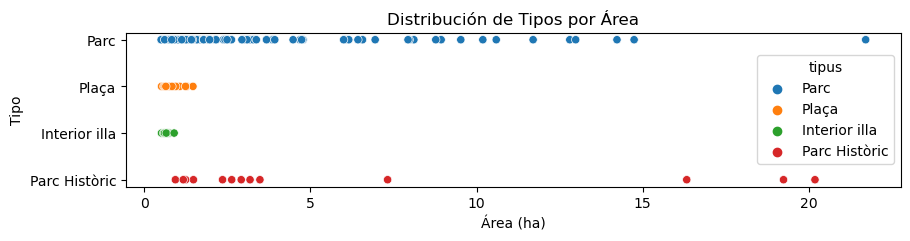

In [10]:
# Crear un scatter plot
plt.figure(figsize=(10, 2))
sns.scatterplot(x='area_ha', y ='tipus', data = public_green_spaces, hue = 'tipus')

# Añadir etiquetas y título
plt.xlabel('Área (ha)')
plt.ylabel('Tipo')
plt.title('Distribución de Tipos por Área')

In [11]:
public_green_spaces['area_ha'].min (), public_green_spaces['area_ha'].max ()

(0.508118124882, 21.7051305225)

In [12]:
public_green_spaces['districte'].value_counts ()

Sants-Montjuïc           36
Sant Martí               28
Horta-Guinardó           21
Sarrià - Sant Gervasi    18
Nou Barris               18
Corts                    17
Sant Andreu              16
Eixample                 11
Sarria-Sant Gervasi       5
Ciutat Vella              4
Gracia                    3
Sants-Montjuic            3
Graçia                    1
SarriaGervasi             1
Name: districte, dtype: int64

In [13]:
public_green_spaces.shape

(190, 6)

In [14]:
# Delete rows
public_green_spaces = public_green_spaces[public_green_spaces['municipi'] != "l'Hospitalet de Llobregat"]
public_green_spaces = public_green_spaces[public_green_spaces['municipi'] != "Sant Adrià de Besòs"]
public_green_spaces = public_green_spaces[public_green_spaces['municipi'] != "El Prat de Llobregat"]

In [15]:
public_green_spaces['municipi'].value_counts ()

Barcelona                   182
Santa Coloma de Gramanet      1
Name: municipi, dtype: int64

In [16]:
public_green_spaces.shape

(183, 6)

In [17]:
public_green_spaces.isna().sum()

municipi     0
tipus        0
area_ha      0
districte    1
codi         0
mida         0
dtype: int64

In [18]:
public_green_spaces = public_green_spaces.dropna ()

In [19]:
public_green_spaces.shape

(182, 6)

In [20]:
public_green_spaces['codi'].nunique ()

182

In [21]:

public_green_spaces = public_green_spaces.drop(columns=['codi'])
public_green_spaces.head (5)

,municipi,tipus,area_ha,districte,mida
0,Barcelona,Parc,0.895251,Sants-Montjuïc,0.5 - 1 Ha
1,Barcelona,Parc,0.651736,Sants-Montjuïc,0.5 - 1 Ha
2,Barcelona,Parc,0.702333,Sants-Montjuïc,0.5 - 1 Ha
3,Barcelona,Parc,0.886938,Sants-Montjuïc,0.5 - 1 Ha
4,Barcelona,Parc,1.939619,Sants-Montjuïc,1 - 2 Ha


In [22]:
public_green_spaces ['districte'] = public_green_spaces ['districte'].replace ({
    'Gracia' : 'GRÀCIA',
    'Graçia' : 'GRÀCIA',
    'Sants-Montjuïc' : 'SANTS - MONTJUÏC',
    'Sants-Montjuic' : 'SANTS - MONTJUÏC',
    'Corts': 'LES CORTS',
    'Sant Martí': 'SANT MARTÍ',
    'Nou Barris': 'NOU BARRIS - SANT ANDREU',
    'Sant Andreu' : 'NOU BARRIS - SANT ANDREU',
    'Horta-Guinardó': 'HORTA - GUINARDÓ',
    'Eixample': 'EIXAMPLE',
    'SarriaGervasi': 'SARRIÀ - SANT GERVASI',
    'Sarrià - Sant Gervasi': 'SARRIÀ - SANT GERVASI',
    'Sarria-Sant Gervasi': 'SARRIÀ - SANT GERVASI',
    'SarriaGervasi': 'SARRIÀ - SANT GERVASI',
    'Ciutat Vella': 'CIUTAT VELLA'})

In [23]:
public_green_spaces ['districte'].value_counts ()

SANTS - MONTJUÏC            39
NOU BARRIS - SANT ANDREU    34
SANT MARTÍ                  28
SARRIÀ - SANT GERVASI       24
HORTA - GUINARDÓ            21
LES CORTS                   17
EIXAMPLE                    11
GRÀCIA                       4
CIUTAT VELLA                 4
Name: districte, dtype: int64

In [24]:
public_green_spaces

,municipi,tipus,area_ha,districte,mida
0,Barcelona,Parc,0.895251,SANTS - MONTJUÏC,0.5 - 1 Ha
1,Barcelona,Parc,0.651736,SANTS - MONTJUÏC,0.5 - 1 Ha
2,Barcelona,Parc,0.702333,SANTS - MONTJUÏC,0.5 - 1 Ha
3,Barcelona,Parc,0.886938,SANTS - MONTJUÏC,0.5 - 1 Ha
4,Barcelona,Parc,1.939619,SANTS - MONTJUÏC,1 - 2 Ha
...,...,...,...,...,...
182,Barcelona,Parc,9.523963,LES CORTS,>= 2 Ha
183,Barcelona,Parc,5.999060,LES CORTS,>= 2 Ha
184,Barcelona,Parc,4.735619,SANT MARTÍ,>= 2 Ha
185,Barcelona,Parc,1.786393,LES CORTS,1 - 2 Ha


Text(0.5, 1.0, 'Distribución de Tipos por Área')

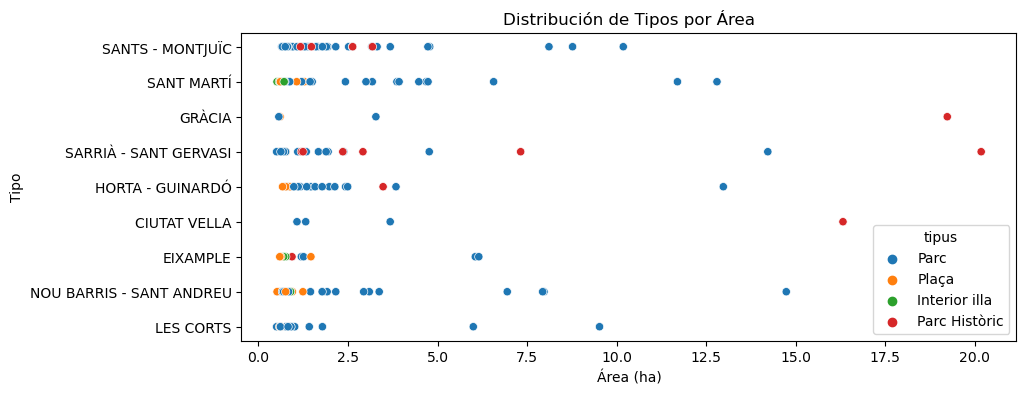

In [25]:
# Crear un scatter plot
plt.figure(figsize=(10, 4))
sns.scatterplot(x='area_ha', y ='districte', data = public_green_spaces, hue = 'tipus')#, hue = 'districte')

# Añadir etiquetas y título
plt.xlabel('Área (ha)')
plt.ylabel('Tipo')
plt.title('Distribución de Tipos por Área')

In [26]:
public_green_spaces = public_green_spaces.groupby ('districte')['area_ha'].sum ().reset_index ()
public_green_spaces

,districte,area_ha
0,CIUTAT VELLA,22.396868
1,EIXAMPLE,20.451269
2,GRÀCIA,23.687086
3,HORTA - GUINARDÓ,44.475658
4,LES CORTS,28.730638
5,NOU BARRIS - SANT ANDREU,72.250494
6,SANT MARTÍ,76.352854
7,SANTS - MONTJUÏC,90.776644
8,SARRIÀ - SANT GERVASI,71.190508


In [27]:
public_green_spaces = public_green_spaces.rename (columns = {'districte':'DISTRICT', 'area_ha':'GREEN_AREA'})

In [28]:
green_spaces = public_green_spaces.reset_index(drop=True)

In [29]:
green_spaces

,DISTRICT,GREEN_AREA
0,CIUTAT VELLA,22.396868
1,EIXAMPLE,20.451269
2,GRÀCIA,23.687086
3,HORTA - GUINARDÓ,44.475658
4,LES CORTS,28.730638
5,NOU BARRIS - SANT ANDREU,72.250494
6,SANT MARTÍ,76.352854
7,SANTS - MONTJUÏC,90.776644
8,SARRIÀ - SANT GERVASI,71.190508


# I will standardize the district areas for two reasons:

- 1.Because they will serve as a comparison parameter.
- 2.Because there are no measurement points for each of the Nou Barris and Sant Andreu districts, both were considered as a single district, thus adding more green area.

# WEB SCRAPING

In [30]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

In [31]:
url = "https://es.wikipedia.org/wiki/Distritos_de_Barcelona"
response = requests.get (url)

In [32]:
response.status_code

200

In [33]:
soup = BeautifulSoup(response.content, "html.parser")

In [34]:
district_area = {'DISTRICT' : [] , 'AREA' : []}

In [35]:
soup.find_all ('b')[18]('a')[0]['title']

'Distrito de San Martín (Barcelona)'

In [36]:
soup.find_all ('td')[3].get_text ()

'4,11\n'

In [37]:
soup.find_all ('td')[3].get_text ().strip ()

'4,11'

In [38]:
float(soup.find_all ('td')[3].get_text ().strip ().replace (',','.'))

4.11

In [39]:
district_area

{'DISTRICT': [], 'AREA': []}

In [40]:
# I'm creating a loop to scrape all the relevant information.
for i in range (9,19):
    district_area['DISTRICT'].append(soup.find_all ('b')[i]('a')[0]['title'])
    
for i in range (3, 76, 8):
    district_area ['AREA'].append (float(soup.find_all ('td')[i].get_text ().strip ().replace (',','.')))

district_area = pd.DataFrame (district_area)

In [41]:
district_area

,DISTRICT,AREA
0,Distrito de Ciudad Vieja (Barcelona),4.11
1,Distrito del Ensanche,7.46
2,Distrito de Sants-Montjuïc,22.68
3,Distrito de Les Corts,6.02
4,Distrito de Sarriá-San Gervasio,19.91
5,Distrito de Gracia,4.19
6,Horta-Guinardó,11.96
7,Distrito de Nou Barris,8.05
8,Distrito de San Andrés (Barcelona),6.59
9,Distrito de San Martín (Barcelona),10.39


District Area is in KM2

In [42]:
district_area ['DISTRICT'] = district_area ['DISTRICT'].replace ({
    'Distrito de San Martín (Barcelona)': 'SANT MARTÍ',
    'Distrito de San Andrés (Barcelona)' : 'NOU BARRIS - SANT ANDREU',
    'Distrito de Nou Barris': 'NOU BARRIS - SANT ANDREU',
    'Horta-Guinardó': 'HORTA - GUINARDÓ',
    'Distrito de Gracia' : 'GRÀCIA',
    'Distrito de Sarriá-San Gervasio': 'SARRIÀ - SANT GERVASI',
    'Distrito de Les Corts': 'LES CORTS',
    'Distrito de Sants-Montjuïc' : 'SANTS - MONTJUÏC',
    'Distrito del Ensanche': 'EIXAMPLE',
    'Distrito de Ciudad Vieja (Barcelona)': 'CIUTAT VELLA'})

district_area

,DISTRICT,AREA
0,CIUTAT VELLA,4.11
1,EIXAMPLE,7.46
2,SANTS - MONTJUÏC,22.68
3,LES CORTS,6.02
4,SARRIÀ - SANT GERVASI,19.91
5,GRÀCIA,4.19
6,HORTA - GUINARDÓ,11.96
7,NOU BARRIS - SANT ANDREU,8.05
8,NOU BARRIS - SANT ANDREU,6.59
9,SANT MARTÍ,10.39


In [43]:
district_area[district_area ['DISTRICT'] == 'NOU BARRIS - SANT ANDREU']

,DISTRICT,AREA
7,NOU BARRIS - SANT ANDREU,8.05
8,NOU BARRIS - SANT ANDREU,6.59


In [44]:
district_area.groupby ('DISTRICT')['AREA'].sum ()

DISTRICT
CIUTAT VELLA                 4.11
EIXAMPLE                     7.46
GRÀCIA                       4.19
HORTA - GUINARDÓ            11.96
LES CORTS                    6.02
NOU BARRIS - SANT ANDREU    14.64
SANT MARTÍ                  10.39
SANTS - MONTJUÏC            22.68
SARRIÀ - SANT GERVASI       19.91
Name: AREA, dtype: float64

In [45]:
district_area = district_area.groupby ('DISTRICT')['AREA'].sum ().reset_index ()
district_area

,DISTRICT,AREA
0,CIUTAT VELLA,4.11
1,EIXAMPLE,7.46
2,GRÀCIA,4.19
3,HORTA - GUINARDÓ,11.96
4,LES CORTS,6.02
5,NOU BARRIS - SANT ANDREU,14.64
6,SANT MARTÍ,10.39
7,SANTS - MONTJUÏC,22.68
8,SARRIÀ - SANT GERVASI,19.91


In [46]:
def km2_to_ha (x):
    x = x * 100
    return x

In [47]:
district_area['AREA'] = list(map(km2_to_ha, district_area['AREA']))

In [48]:
district_area

,DISTRICT,AREA
0,CIUTAT VELLA,411.0
1,EIXAMPLE,746.0
2,GRÀCIA,419.0
3,HORTA - GUINARDÓ,1196.0
4,LES CORTS,602.0
5,NOU BARRIS - SANT ANDREU,1464.0
6,SANT MARTÍ,1039.0
7,SANTS - MONTJUÏC,2268.0
8,SARRIÀ - SANT GERVASI,1991.0


In [50]:

ratio_gs_area = pd.merge (district_area, green_spaces, how = 'left', on = 'DISTRICT')


In [51]:
ratio_gs_area

,DISTRICT,AREA,GREEN_AREA
0,CIUTAT VELLA,411.0,22.396868
1,EIXAMPLE,746.0,20.451269
2,GRÀCIA,419.0,23.687086
3,HORTA - GUINARDÓ,1196.0,44.475658
4,LES CORTS,602.0,28.730638
5,NOU BARRIS - SANT ANDREU,1464.0,72.250494
6,SANT MARTÍ,1039.0,76.352854
7,SANTS - MONTJUÏC,2268.0,90.776644
8,SARRIÀ - SANT GERVASI,1991.0,71.190508


In [52]:
# I will merge the two dataframes.
ratio_gs_area['RATIO'] = round (ratio_gs_area['GREEN_AREA']/ratio_gs_area['AREA'], 4)

In [53]:
ratio_gs_area

,DISTRICT,AREA,GREEN_AREA,RATIO
0,CIUTAT VELLA,411.0,22.396868,0.0545
1,EIXAMPLE,746.0,20.451269,0.0274
2,GRÀCIA,419.0,23.687086,0.0565
3,HORTA - GUINARDÓ,1196.0,44.475658,0.0372
4,LES CORTS,602.0,28.730638,0.0477
5,NOU BARRIS - SANT ANDREU,1464.0,72.250494,0.0494
6,SANT MARTÍ,1039.0,76.352854,0.0735
7,SANTS - MONTJUÏC,2268.0,90.776644,0.0400
8,SARRIÀ - SANT GERVASI,1991.0,71.190508,0.0358


In [54]:
ratio_gs_area['RATIO'].describe ()

count    9.000000
mean     0.046889
std      0.013736
min      0.027400
25%      0.037200
50%      0.047700
75%      0.054500
max      0.073500
Name: RATIO, dtype: float64

In [55]:
# I assign categorical variables to group the districts into quartiles.
def area_group (x):
    if x <= 0.037200:
        return 'GREEN_AREA_Q1'
    
    if x <= 0.047700:
        return 'GREEN_AREA_Q2'
    
    if x <= 0.054500:
        return 'GREEN_AREA_Q3'
    
    if x > 0.054500:
        return 'GREEN_AREA_Q4'
    else:
        return x


In [56]:
ratio_gs_area['RATIO'] = list(map(area_group, ratio_gs_area['RATIO']))

In [57]:
ratio_gs_area['RATIO'].unique ()

array(['GREEN_AREA_Q3', 'GREEN_AREA_Q1', 'GREEN_AREA_Q4', 'GREEN_AREA_Q2'],
      dtype=object)

In [58]:
ratio_gs_area.to_csv('ratio_gs_area.csv', index=False)